In [1]:
#Keras
import tensorflow as tf
sess = tf.Session()
from keras import backend as K
K.set_session(sess)

Using TensorFlow backend.


In [2]:
#Import
import h5py
import matplotlib.pyplot as plt
from scipy.misc import toimage
import cv2
import numpy as np
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
import keras

In [3]:
#Load Cifar10 
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
print train_features.shape
num_train, img_cols, img_rows, img_channels =  train_features.shape
num_test, _, _, _= test_features.shape
num_classes = len(np.unique(train_labels))

(50000, 32, 32, 3)


In [4]:
print "Number Train: "+ str(num_train)
print "Image Rows: "+ str(img_rows)
print "Image Cols: "+ str(img_cols)
print "Image Channels: "+ str(img_channels)
print "Number Test: "+ str(num_test)
print "Number Class: " + str(num_classes)

Number Train: 50000
Image Rows: 32
Image Cols: 32
Image Channels: 3
Number Test: 10000
Number Class: 10


In [5]:
Train_features = train_features[:8000]
Test_features = test_features[:800]
Train_labels = train_labels[:8000]
Test_labels = test_labels[:800]

In [6]:
Train_features = Train_features.astype('float32')/255.0
Test_features = Test_features.astype('float32')/255.0
Train_labels = np_utils.to_categorical(Train_labels, num_classes)
Test_labels = np_utils.to_categorical(Test_labels, num_classes)
#print Train_lables[0]
#print Test_labels[0]

In [7]:
batch_size = 200
epochs = 35

In [65]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=train_features.shape[1:]))
    # print model.output_shape    
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    #print model.output_shape  
model.add(MaxPooling2D(pool_size=(2, 2)))
    #print model.output_shape     
model.add(Dropout(0.25))
    #print model.output_shape     
    
    
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    #print model.output_shape     
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    #print model.output_shape     
model.add(MaxPooling2D(pool_size=(2, 2)))
    #print model.output_shape     
model.add(Dropout(0.25))
    #print model.output_shape     


model.add(Flatten())
    #print model.output_shape    
model.add(Dense(1024, activation='relu'))
    #print model.output_shape     
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
    #print model.output_shape     

TypeError: add() got an unexpected keyword argument 'padding'

In [9]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=["accuracy"])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
__________

In [11]:
# Train the model
model.fit(Train_features, Train_labels,
        batch_size=batch_size,
        shuffle=True,
        epochs=epochs,
        validation_data=(Test_features,Test_labels),
        callbacks=[TensorBoard(log_dir='/tmp/test2')])
 
# Evaluate the model
# scores = model.evaluate(Test_features, Test_labels)
scores = model.evaluate(Train_features, Train_labels)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

#tensorboard --logdir=/tmp/test2


Train on 8000 samples, validate on 800 samples
Epoch 1/35
8000/8000 [==============================] - 40s - loss: 2.0213 - acc: 0.2424 - val_loss: 1.7676 - val_acc: 0.3600
Epoch 2/35
8000/8000 [==============================] - 36s - loss: 1.6996 - acc: 0.3713 - val_loss: 1.5877 - val_acc: 0.4262
Epoch 3/35
8000/8000 [==============================] - 39s - loss: 1.5479 - acc: 0.4335 - val_loss: 1.5242 - val_acc: 0.4437
Epoch 4/35
8000/8000 [==============================] - 38s - loss: 1.4595 - acc: 0.4686 - val_loss: 1.4240 - val_acc: 0.4850
Epoch 5/35
8000/8000 [==============================] - 36s - loss: 1.3534 - acc: 0.5071 - val_loss: 1.3788 - val_acc: 0.5200
Epoch 6/35
8000/8000 [==============================] - 35s - loss: 1.2986 - acc: 0.5345 - val_loss: 1.3142 - val_acc: 0.5288
Epoch 7/35
8000/8000 [==============================] - 35s - loss: 1.2226 - acc: 0.5587 - val_loss: 1.2770 - val_acc: 0.5487
Epoch 8/35
8000/8000 [==============================] - 35s - loss: 1.1

In [12]:
model.save("model_cifar_keras.h5")

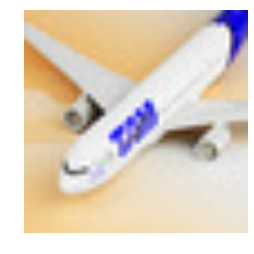

In [13]:
img = cv2.imread("airplane.jpg")
plt.imshow(img ,cmap='gray')
plt.axis('off')
plt.show()

In [14]:
img = cv2.resize(img, dsize=(32, 32))
test = np.asarray([img])
print model.predict(test)
#class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [15]:
model.layers

In [16]:
model.layers[0].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'batch_input_shape': (None, 32, 32, 3),
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 16,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3, 3),
 'name': 'conv2d_1',
 'padding': 'valid',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

In [17]:
print model.layers[0].get_weights()[0].shape
print model.layers[0].get_weights()[1].shape

(3, 3, 3, 16)
(16,)


In [18]:
model.layers[0].get_weights()[0]

array([[[[-0.08445977,  0.02460846,  0.09955288, -0.11805061, -0.14357431,
           0.17850563, -0.07702461, -0.06952938, -0.03635788,  0.12514773,
          -0.10973372,  0.04968651,  0.13377479, -0.08837411, -0.08864263,
           0.01164132],
         [ 0.00554844, -0.02870431, -0.04191394, -0.1570155 ,  0.02540061,
          -0.09037542,  0.10549656,  0.04934921, -0.1263023 , -0.08414254,
          -0.1796917 , -0.06648246, -0.1571888 , -0.00505354,  0.10412671,
           0.18942939],
         [ 0.02888714,  0.08607011,  0.04314767, -0.06899441, -0.11800829,
          -0.16887255, -0.01363582,  0.11760779,  0.03200873, -0.11473148,
           0.0335945 , -0.07223893,  0.09626749,  0.1360693 ,  0.19226581,
          -0.16812795]],

        [[-0.03070869, -0.10724663, -0.12217598,  0.10321037, -0.17132151,
          -0.21652187, -0.17283213, -0.00667202, -0.01323004,  0.05953913,
          -0.01431818,  0.12343159,  0.05334784,  0.14557448, -0.00249206,
           0.14310655],
  

In [19]:
model.layers[1].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'filters': 32,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3, 3),
 'name': 'conv2d_2',
 'padding': 'valid',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

In [20]:
model.layers[0].input_shape

(None, 32, 32, 3)

In [21]:
model.layers[0].output_shape

(None, 30, 30, 16)

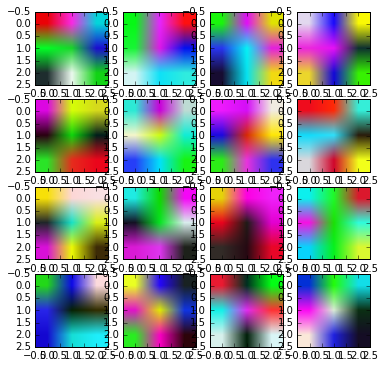

In [52]:
x1w = model.layers[0].get_weights()[0]
length = len(x1w[0][0][0][:])
x = 4
y = int(np.ceil(length / x))
# Visualization of each filter of the layer
fig = plt.figure(figsize=(6,6))
for i in range(length):
    ax = fig.add_subplot(x,y,i+1)
    ax.imshow(x1w[:,:,:,i])
    #ax.imshow(x1w[:,:,:,i],interpolation="nearest")
plt.show()

(32, 32, 3)


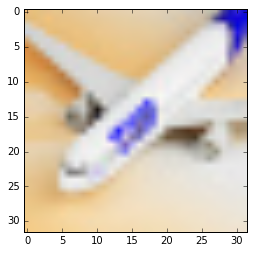

In [32]:
plt.imshow(img )
print img.shape
plt.show()

In [24]:
output_layer = model.layers[0].output

In [25]:
output_layer.shape

TensorShape([Dimension(None), Dimension(30), Dimension(30), Dimension(16)])

In [26]:
# choose any image to want by specifying the index
img_to_visualize = img
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)
img_to_visualize.shape

(1, 32, 32, 3)

In [61]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    
    length = len(convolutions[0][0])
    y = 8
    x = int(np.ceil(length / y))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(length):
        ax = fig.add_subplot(x,y,i+1)
        ax.imshow(convolutions[:,:,i])
    plt.show()

Layer 0:
('Shape of conv:', (30, 30, 16))


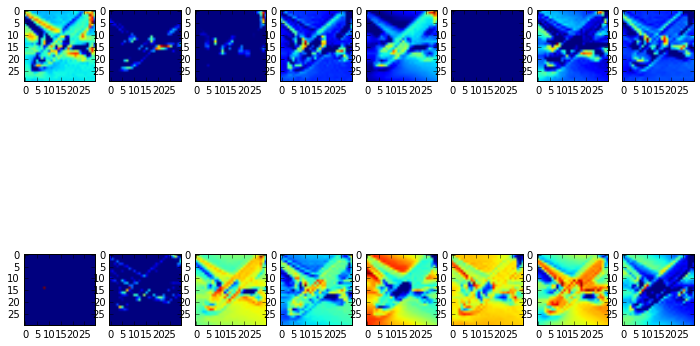

Layer 1:
('Shape of conv:', (28, 28, 32))


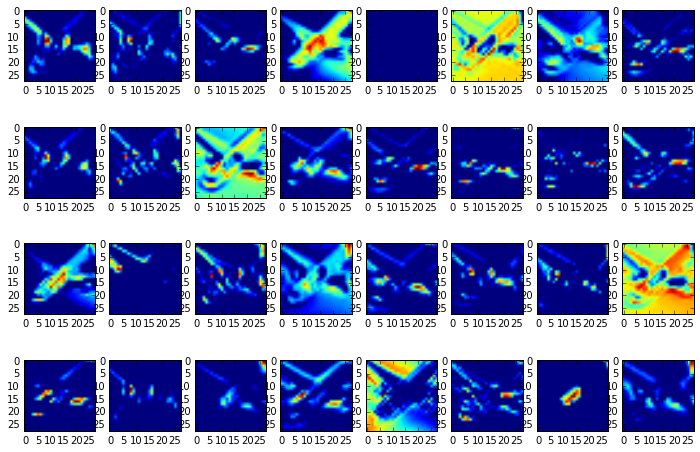

Layer 2:
('Shape of conv:', (14, 14, 32))


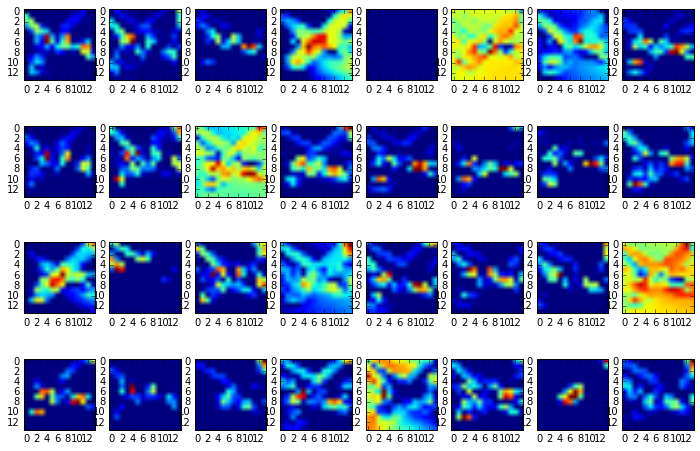

Layer 3:
('Shape of conv:', (14, 14, 32))


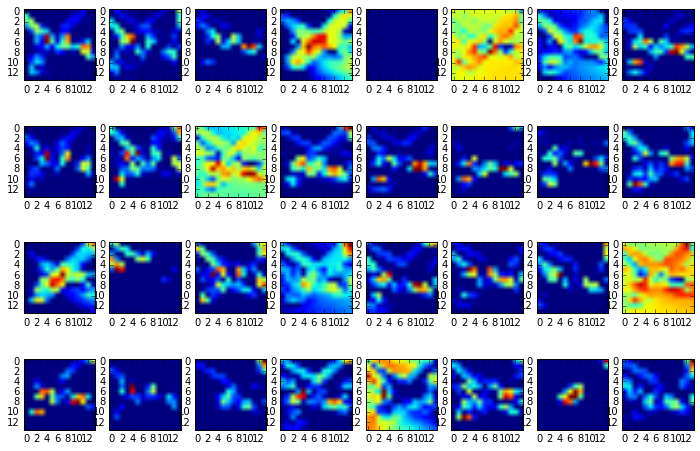

Layer 4:
('Shape of conv:', (12, 12, 64))


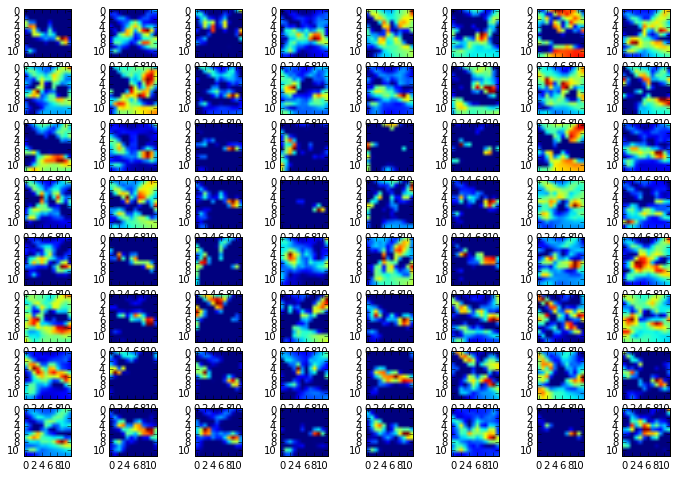

Layer 5:
('Shape of conv:', (10, 10, 128))


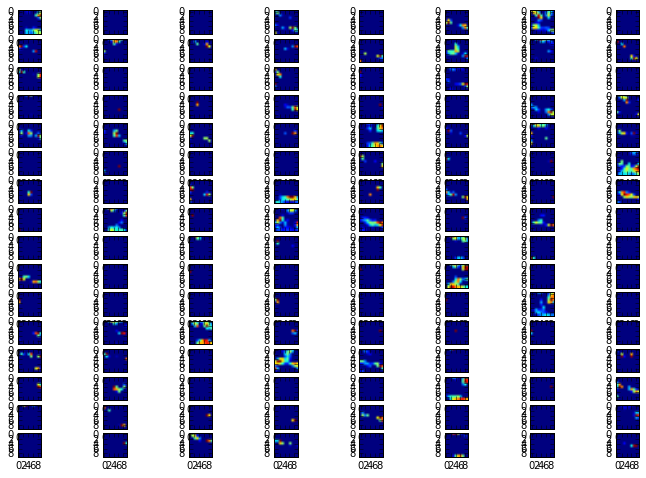

Layer 6:
('Shape of conv:', (5, 5, 128))


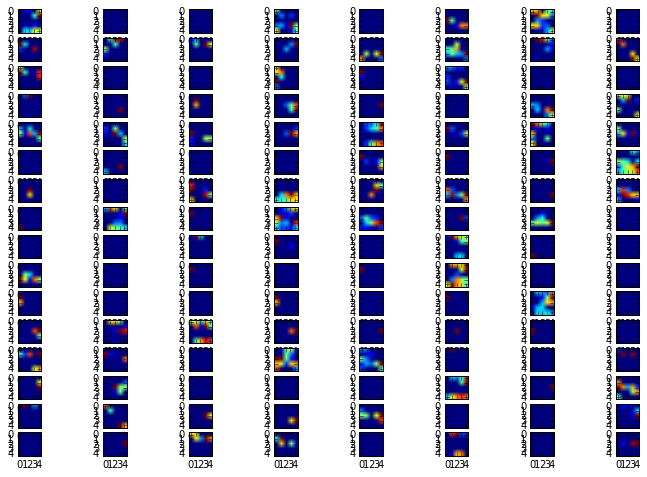

Layer 7:
('Shape of conv:', (5, 5, 128))


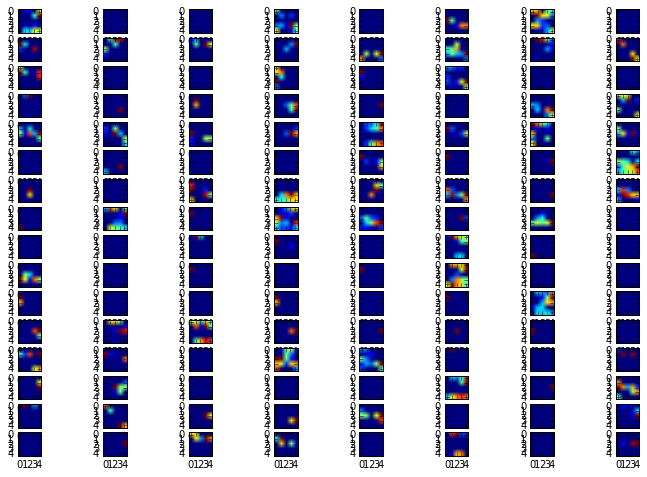

In [63]:
for i in range(8):
    print "Layer " + str(i) + ":"
    layer_to_visualize(model.layers[i])